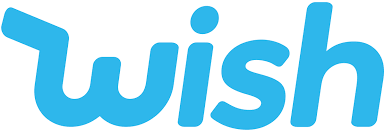

# INTRODUCTION

E-commerce platform becomes reality of disruption that changes the form of pyhisical transactions into online (despite social media), especially in the developing world. Using this platform, entrepreneurs can take advantage of it in business optimization, accelerating business development, access to new market segments, etc. But the question likely to appear is about how to do so?

Knowing how the market works is one of the most important key in planning business model to be built. By supply and demand theory, price is dominant factor that drives quantity sold and assuming another variable are constat. So by using the question of how the market interact to get maximum sales/profit, we can specify it through customer personalization and customer buying behaviour.



# CONTEXT

In this notebook, i used Wish summer clothes sales dataset that contain a lot of information we can dig for and defined Units Sold feature as a key metric that measure market perfomance by each product/merchant. Firstly, we build hypothesis variable that affect Units Sold:
1. Price: the amount of money paid for the product, the higher the price the lower the units sold
2. Gap Price: the the difference between the seller's price and the retail price, the higher the gap the lower the units sold
3. Product Rating: the review by number that customer give to the product
4. Merchant Rating: the review by number that customer give to the merchant
5. Product Inventory Variation: the number of types of products available at merchant
6. Ad Boosts: wether the merchant use ad boosts provided by the platform
7. Total Tags: number of tags that seller used


In order to expand our analysis, we did some feature extraction through available feature in the dataset such as:
1. Product Size
2. Product Color
3. Product Gender Information
4. Gap Price
5. 4 and 5 Star Rating Percentage and Count
6. Total Tags Used

In [ ]:
!pip install joypy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from joypy import joyplot
import squarify
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [ ]:
df = pd.read_csv('/kaggle/input/summer-products-and-sales-in-ecommerce-wish/summer-products-with-rating-and-performance_2020-08.csv')
df.head()

In [ ]:
df.columns

In [ ]:
df.info()

# Data Preprocessing

In [ ]:
df.duplicated().any()

In [ ]:
#there is duplicate input so we will drop it though

df = df.drop_duplicates()

#dropped unnecessary feature

df.drop(['title', 'currency_buyer', 'urgency_text','merchant_info_subtitle', 'merchant_profile_picture', 'product_url', 
'product_picture', 'product_id', 'theme', 'inventory_total', 'crawl_month'], axis = 1, inplace = True)

#here we check null values in the dataset

null_val = pd.DataFrame(df.isnull().sum())
null_val.columns = ['null_val']
null_val['percent_'] = round(null_val['null_val'] / len(df.index), 2) * 100
null_val.sort_values('percent_', ascending = False)[:10]

In [ ]:
#because there are small null values detected, so we just throw it out from the dataset

df.drop(columns = 'has_urgency_banner', axis = 1, inplace = True)
df = df.dropna().reset_index()
df.drop(columns = ['index'], axis = 1, inplace = True)
df.isnull().sum()[:10]

In [ ]:
len(df.index)

We have two feature that contain a lot of unique value (Product Size and Product Color). The data is narrowed down in several "Size" and "Color" which have a large proportion in the dataset.

In [ ]:
df['product_variation_size_id'] = df['product_variation_size_id'].apply(lambda x: x.upper())
size_list = list(df['product_variation_size_id'])

xxs_err = []
xs_err = []
s_err = []
m_err = []
l_err = []
xl_err = []
xxl_err = []

for i in size_list:
    if (i == 'XXS') or (i == 'XXXS') or (i == 'SIZE XXS') or (i == 'SIZE-XXS') or (i == 'SIZE -XXS'):
        xxs_err.append(i)
    elif (i == 'XS') or (i == 'XS.') or (i == 'SIZE XS') or (i == 'SIZE-XS'):
        xs_err.append(i)
    elif (i == 'S') or (i == 'S.') or (i == 'SUIT-S') or (i == 'SIZE S.') or (i == 'SIZE S') or (i == 'S..') \
    or (i == 'S(BUST 88CM)') or (i == 'S (WAIST58-62CM)') or (i == 'SIZE-S') or (i == 'S DIAMETER 30CM') or (i == '25-S') \
    or (i == 'SIZE/S') or (i == 'PANTS-S') or (i == 'SIZE--S'):
        s_err.append(i)
    elif (i == 'M') or (i == 'M.') or (i == 'SIZE M'):
        m_err.append(i)
    elif (i == 'L') or (i == '32/L') or (i == 'L.') or (i == 'SIZEL'):
        l_err.append(i)
    elif (i == 'XL') or (i == 'X   L'):
        xl_err.append(i)
    elif (i == 'XXL') or (i == 'XXXXXL') or (i == '3XL') or (i == 'SIZE-4XL') or (i == 'XXXL') or (i == '5XL') \
    or (i == '2XL') or (i == '4XL') or (i == 'XXXXL') or (i == '6XL') or (i == 'SIZE-5XL') or (i == 'SIZE4XL') \
    or (i == '04-3XL') or (i == '1 PC - XL'):
        xxl_err.append(i)
        
def size(tipe):
    if tipe in xxs_err:
        return 'XXS'
    elif tipe in xs_err:
        return 'XS'
    elif tipe in s_err:
        return 'S'
    elif tipe in m_err:
        return 'M'
    elif tipe in l_err:
        return 'L'
    elif tipe in xl_err:
        return 'XL'
    elif tipe in xxl_err:
        return 'XXL'
    else:
        return 'OTHER'
    
df['product_variation_size_id'] = df['product_variation_size_id'].apply(size)  

pd.DataFrame(df['product_variation_size_id'].value_counts())

In [ ]:
df['product_color'] = df['product_color'].apply(lambda x: x.title())
color_list = list(df['product_color'])

red_un = []
green_un = []
white_un = []
black_un = []
blue_un = []
yellow_un = []
grey_un = []
purple_un = []

for i in color_list:
    if 'Red' in i:
        red_un.append(i)
    elif ('Green' in i) and (i != 'White & Green') and (i != 'Black & Green'):
        green_un.append(i)
    elif (i == 'White') or (i == 'Whiteflora') or (i == 'Offwhite') or (i == 'Whitestripe'):
        white_un.append(i)
    elif (i == 'Black') or (i == 'Coolblack') or (i == 'Offblack'):
        black_un.append(i)
    elif ('Blue' in i) and (i != 'Navyblue & White') and (i != 'Black & Blue') and (i != 'Blue & Pink') \
    and (i != 'Pink & Blue'):
        blue_un.append(i)
    elif (i == 'Yellow') or (i == 'Lightyellow'):
        yellow_un.append(i)
    elif (i == 'Grey') or (i == 'Greysnakeskinprint') or (i == 'Lightgrey') or (i == 'Gray') or (i == 'Lightgray'):
        grey_un.append(i)
    elif 'Purple' in i:
        purple_un.append(i)
        
def color(tipe):
    if tipe in red_un:
        return 'Red'
    elif tipe in green_un:
        return 'Green'
    elif tipe in white_un:
        return 'White'
    elif tipe in black_un:
        return 'Black'
    elif tipe in blue_un:
        return 'Blue'
    elif tipe in yellow_un:
        return 'Yellow'
    elif tipe in grey_un:
        return 'Gray'
    elif tipe in purple_un:
        return 'Purple'
    else:
        return 'Other'
        
df['product_color'] = df['product_color'].apply(color)
pd.DataFrame(df['product_color'].value_counts()).head()

In [ ]:
#extracting gender information through product title

df['title_orig'] = df['title_orig'].apply(lambda x: x.title())

women_err = []

def prod_gen(tipe):
    for i in df['title_orig']:
        if ('Man' in i) or ('Men' in i) and (i != 'Woman') :
            women_err.append(i)
    if tipe in women_err:
        return 'Man'
    else:
        return 'Woman'
        
df.insert(1, 'prod_gen', df['title_orig'].apply(prod_gen))

df['prod_gen'].value_counts()

In [ ]:
df.insert(4, 'gap_price', df['retail_price'] - df['price'])

#df['units_sold'] = df['units_sold'].apply(
#    lambda x: '100-1000' if x <= 100 else '1000-5000' if x == 1000 else '5000-10000' if x == 5000 else '10000-20000' \
#    if x == 10000 else '20000-50000' if x == 20000 else '50000-100000' if x == 50000 else '100000+')


df['units_sold'] = df['units_sold'].apply(lambda x: 100 if x <= 100 else x)

#df['units_sold'] = df['units_sold'].apply(
#    lambda x: 1 if x <= 100 else 2 if x == 1000 else 3 if x == 5000 else 4 \
#    if x == 10000 else 5 if x == 20000 else 6 if x == 50000 else 7)

df['gap_price'] = np.abs(round((df['price'] - df['retail_price']) / df['retail_price'] * 100, 1))
df['4and5_count'] = df['rating_five_count'] + df['rating_four_count']
df['percent_4and5'] = round(df['4and5_count'] / df['rating_count'] * 100, 2)
df['total_tags'] = df['tags'].apply(lambda x: len(x.split(',')))


#variable in order
sold_order = [100, 1000, 5000, 10000, 20000, 50000, 100000]
units_sold_order = ['100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000',
                    '100000+']

#palette visualization
pal_list = ['#66ccff', '#0099cc', '#003399', '#ccffcc', '#b3b3d7', '#d1cab0', '#c3c3e5', '#443266']

# Customer Personalization Breakdown

As we know that the buyers/customers are looking for the items they want to buy. This is where customer personalization came from. Studies have shown that 88% of U.S. marketers reported seeing measurable improvements due to personalization, and 44% of consumers said they would become repeat buyers after a personalized shopping experience with a company. What’s more, businesses saw an average increase of 20% in sales when using personalized experiences.

In [ ]:
woman = df[df['prod_gen'] == 'Woman'].loc[:, 'units_sold'].value_counts()
man = df[df['prod_gen'] == 'Man'].loc[:, 'units_sold'].value_counts()
gen_sold = pd.Series({'Man_Prod': np.sum(np.array([46,22,9,7,1,0,0]) * sold_order),
                     'Woman_Prod': np.sum(woman.values * sold_order)}).reset_index().set_index('index').T

fig, ax = plt.subplots(1, 1, figsize = (6.5, 2))

ax.barh(gen_sold.index, gen_sold['Man_Prod'], color = 'gray', alpha = 0.9, label = 'Man Product Sold')
ax.barh(gen_sold.index, gen_sold['Woman_Prod'], left = gen_sold['Man_Prod'], color = '#66ccff', alpha = 0.9, 
        label = 'Woman Product Sold')

ax.set_xticks([])
ax.set_yticks([])
ax.legend().set_visible(False)
for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)

bbox_args = dict(boxstyle="round", fc="#e2d810", color = '#e2d810')
ax.annotate('Men Product Sold({}k)'.format(gen_sold['Man_Prod'][0] / 1000),
            xy=(gen_sold['Man_Prod'] / 2, 0.4),
            xycoords='data',
            xytext=(gen_sold['Man_Prod'] / 2, 1),
            arrowprops=dict(arrowstyle='->', color='blue', lw = 3), 
            fontsize=12, bbox=dict(boxstyle="round", fc="gray", color = 'gray'))
ax.annotate('Women Product Sold ({}k)'.format(gen_sold['Woman_Prod'][0] / 1000),
            xy=(gen_sold['Woman_Prod'] + 200000, 0),
            xycoords='data',
            xytext=(gen_sold['Woman_Prod'] + 1000000, -0.03),
            arrowprops=dict(arrowstyle='-[, widthB=4, lengthB=1', lw=3, color='blue'), fontsize=12, 
                            bbox=dict(boxstyle="round", fc="#66ccff", color = '#66ccff'))

ax.text(2107300, 0.7, 'Who are the most buyer? Men or Women?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.show()

In [ ]:
size_map = df.groupby(['units_sold', 'product_variation_size_id']).count().loc[:, 'title_orig'].reset_index()
size_map['size_sold'] = size_map['units_sold'] * size_map['title_orig']
data_size = size_map.groupby('product_variation_size_id')['size_sold'].sum().sort_values(ascending = False).reset_index()

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

perc = [str('{:5.2f}'.format(i / data_size['size_sold'].sum() * 100)) + "%" for i in data_size['size_sold']]
lbl = [el[0] + " = " + el[1] for el in zip(data_size['product_variation_size_id'], perc)]

squarify.plot(sizes = data_size['size_sold'], label = lbl, alpha = 0.8, ax = ax, 
              color = pal_list)

ax.text(0, 105, 'What product sizes are customers looking for?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})
plt.axis('off')
plt.show()

In [ ]:
other_col = ['Pink', 'Pair Color', 'Armygreen', 'Winered', 'Navyblue', 'Other']
size_other_col = [99, 38, 30, 27, 27, 181]

prod_col = df.groupby(['units_sold', 'product_color']).count().loc[:, 'title_orig'].reset_index()
prod_col['color_sold'] = prod_col['units_sold'] * prod_col['title_orig']
data_col = prod_col.groupby('product_color')['color_sold'].sum().sort_values(ascending = False).reset_index()
data_col['percent'] = round(data_col['color_sold'] / data_col['color_sold'].sum(), 2)

fig, ax = plt.subplots(1, 1, figsize = (15, 10))

label = ['Other', 'Black', 'White', 'Gray', 'Green', 'Red', 'Blue', 'Purple', 'Yellow']
size_color = [0.26, 0.24, 0.17, 0.07, 0.06, 0.06, 0.05, 0.05, 0.04]
explode = [0.15, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(size_color, labels = label, explode = explode, autopct = '%1.1f%%', 
             counterclock = True, shadow = True, radius = 1.1, 
             colors = [ 'brown', 'black', 'white', 'gray', 'green', 'red', 'blue', 'purple', 'yellow', 'white'])

ax.text(2, 1, 'MOST OTHER COLOR LIST:', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox=dict(boxstyle="round", fc="white", color = '#66ccff'))

ax.text(-0.1, 1.5, 'What product colors are customers looking for?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

y_pos = [0.8, 0.6, 0.4, 0.2, 0, -0.2]
for i, y in zip(other_col, y_pos):
    ax.text(2, y, f'- {i}', fontsize = 10, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox = dict(boxstyle = "round", color = 'white'))
    
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 10))

data_tag = pd.read_csv('/kaggle/input/summer-products-and-sales-in-ecommerce-wish/unique-categories.sorted-by-count.csv')[:12].set_index('keyword')
ax.barh(data_tag.index, width = data_tag['count'], zorder = 3, color = '#66ccff', height = 0.6)
for s in ['right','top']:
    ax.spines[s].set_visible(False)
    
ax.set_xlabel('Tags Count', fontweight = 'bold')
ax.set_ylabel('')
ax.invert_yaxis()

ax.text(0, -2, 'What tags do merchants use to attract attention except "Summer"?', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

plt.show()

# Market Insight: What Factor Affect Units Sold?

In [ ]:
#FUN FACT

#1. 5 highest units sold merchant
#2. 5 highest shipping countries merchant
#3. 5 highest rating five count merchant
high_sold = df.groupby('merchant_name')['units_sold'].sum().sort_values(ascending = False).reset_index()[:5]
high_country = df.groupby('merchant_name')['countries_shipped_to'].max().sort_values(ascending = False).reset_index()[:5]
high_five = df.groupby('merchant_name')['4and5_count'].sum().sort_values(ascending = False).reset_index()[:5]

fig = plt.figure(figsize = (8, 4), dpi = 150)
gs = fig.add_gridspec(1, 1)
gs.update(wspace = 0.2, hspace = 0.4)
ax0 = fig.add_subplot(gs[0, 0])

bg_c = '#fafafa'
fig.patch.set_facecolor(bg_c)
ax0.set_facecolor(bg_c)

for s in ['top','right','left','bottom']:
    ax0.spines[s].set_visible(False)
    
ax0.set_yticklabels('')
ax0.set_xticklabels('')
ax0.tick_params(axis='both',length=0)

ax0.text(0.5, 0.95, "TOP MERCHANT" , color = 'black', fontsize = 24, fontweight = 'bold', 
         fontfamily = 'cursive', ha = 'center')
ax0.text(0.5, 0.75, "Unit Sold", color = '#66ccff', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')
ax0.text(0.5, 0.65, '{} ({}k sold)'.format(high_sold['merchant_name'][0], high_sold['units_sold'][0] / 1000), color = 'gray', 
         fontsize = 15, fontfamily = 'monospace', fontweight = 'bold', ha = 'center')
ax0.text(0.5, 0.45, "Top Rated Product", color = '#66ccff', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace', 
         ha = 'center')
ax0.text(0.5, 0.35, '{} ({}k 5 & 4 star rating count)'.format(high_five['merchant_name'][0], 
        round(high_five['4and5_count'][0].astype(int) / 1000), 2), color = 'gray', fontsize = 15, fontweight = 'bold', 
         fontfamily = 'monospace', ha = 'center')
ax0.text(0.5, 0.15, "Total Shipping Countries", color = '#66ccff', fontsize = 20, fontweight = 'bold', fontfamily = 'monospace', 
         ha = 'center')
ax0.text(0.5, 0.05, '{} ({} countries)'.format(high_country['merchant_name'][0], high_country['countries_shipped_to'][0]), 
         color = 'gray', fontsize = 15, fontweight = 'bold', fontfamily = 'monospace', ha = 'center')

In [ ]:
sold_pricegap = round(df.groupby('units_sold')['gap_price'].mean(), 1)
sold_price = round(df.groupby('units_sold')['price'].mean(), 1)

units_sold_orderk = ['0.1k-1k', '1k-5k', '5k-10k', '10k-20k', '20k-50k', '50k-100k', '100k+']

fig, ax = plt.subplots(figsize = (15, 10))
sns.barplot(x = units_sold_orderk, y = sold_pricegap.values, palette = pal_list, ax = ax)

ax2 = ax.twinx()
ax2.plot(units_sold_orderk, sold_price.values)

for s in ['top']:
    ax.spines[s].set_visible(False)
    ax2.spines[s].set_visible(False)
    
ax.set_xticklabels(units_sold_orderk)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Seller Price Vs Retail Price Gap Mean', fontweight = 'bold')
ax.set_xlabel('')
ax.set_xticks([])
ax.text(0, 75, 'Price & Its Gap VS Units Sold', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

for ind, val in enumerate(units_sold_orderk):
    ax.annotate(f'{val}', xy = (ind - 0.2, 20), va = 'center',
               fontsize = 12, fontweight = 'bold', fontfamily = 'serif', color = 'black')
    
plt.show()

Wee see here on the barplot, 100k+ units sold has higher gap price (67.5%) which means that they sell prices far below the retail price. This is also seen in the lineplot that 100k+ units sold has lower mean price. Interestingly, another units sold categories (less than 100k) have constant price gap values around 30-40%, possibly caused by other variables such as product quality (rating), color match, etc. However we can still saying that most customer are price sensitive. Next, we will see how the rating interact with units sold

In [ ]:
merch_rat_mean = round(df.groupby('units_sold')['merchant_rating'].mean(), 2)
prod_rat_mean = round(df.groupby('units_sold')['rating'].mean(), 2)
coba1 = df[(df['rating'] >= 3.5)].loc[:, ['units_sold']].value_counts()
coba2 = df['units_sold'].value_counts()

data = pd.DataFrame({'units_sold': sold_order, '4+rating_un': list(coba1.values), 'total_un': list(coba2.values)})
data['%got4+_rating'] = round((data['4+rating_un'] / data['total_un']) * 100, 2)

fig, ax = plt.subplots(1, 1, figsize = (18, 8))
sns.boxplot(data = df, x = 'units_sold', y = '4and5_count', ax = ax, palette = pal_list)

for s in ['top', 'right']:
    ax.spines[s].set_visible(False)

for ind, val in enumerate(merch_rat_mean.values):
    ax.annotate(f'Merch Rating Mean: {val}', xy = (ind - 0.4, 17000), fontsize = 9, fontweight = 'bold', 
                fontfamily = 'serif', color = 'black', bbox = dict(boxstyle = "round", fc="#66ccff", color = '#66ccff'))
for ind, val in enumerate(prod_rat_mean.values):
    ax.annotate(f'Prod Rating Mean: {val}', xy = (ind - 0.4, 16100), fontsize = 9, fontweight = 'bold', fontfamily = 'serif', 
                color = 'black', bbox = dict(boxstyle = "round", fc="#66ccff", color = '#66ccff'))
for ind, val in enumerate(data['%got4+_rating']):
    ax.annotate(f'% Product: {val}%', xy = (ind - 0.4, 15100), fontsize = 9, 
                fontweight = 'bold', fontfamily = 'serif', color = 'black', bbox = dict(boxstyle = "round",
                                                                                       fc="#66ccff", color = '#66ccff'))

ax.text(2, 19000, 'Rating VS Units Sold', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

ax.set_ylim(0, 17000)
#ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Units Sold Category', fontweight = 'bold')
ax.set_xticklabels(['100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '100000+'])

plt.show()

Constructing 4 and 5 star rating count would be a good way in defining product quality. So the boxplot above tells us that the more 4 and 5 star rating the product and merchant get, the more units sold they experience. But it seems a little bit bias without referring to the its proportion. As we see in the third box above the chart, all merchants selling 100k+ products have product rating over 4. 

In [ ]:
#Product Variation Inventory VS Units Sold

xx = df[df['product_variation_inventory'] >= 25].loc[:, 'units_sold'].value_counts()
xq = df[df['product_variation_inventory'] < 25].loc[:, 'units_sold'].value_counts()


kk = pd.DataFrame({'Units_Sold': xx.index, '<25_count': xq.values, '>=25_count': xx.values})
kk['%<25'] = round(kk['<25_count'] / (kk['<25_count'] + kk['>=25_count']) * 100, 2)
kk['%>25'] = round(kk['>=25_count'] / (kk['<25_count'] + kk['>=25_count']) * 100, 2)

kk

From the table above, the more products type the merchant have, the more units sold they get. As we see that 80% merchant whose have 25+ product types are tend to be experiencing more units sold. It is clearly because the merchant can expand their audience/customer basis through other product. Units sold increase when total product inventory increasing as well.

In [ ]:
no_ad_boost = df[df['uses_ad_boosts'] == 0]
ad_boost = df[df['uses_ad_boosts'] == 1]


no_ad_sold = pd.DataFrame(no_ad_boost.groupby('units_sold')['uses_ad_boosts'].count())
ad_sold = pd.DataFrame(ad_boost.groupby('units_sold')['uses_ad_boosts'].sum())

fig, ax = plt.subplots(1, 1, figsize = (12, 10))

ax.bar(np.arange(len(no_ad_sold.index)), height = no_ad_sold['uses_ad_boosts'], zorder = 3, color = '#66ccff', width = 0.05,
      label = 'No_ad_Boost')
ax.scatter(np.arange(len(no_ad_sold.index)), no_ad_sold['uses_ad_boosts'], zorder = 3, s = 200, color = '#66ccff')
ax.bar(np.arange(len(ad_sold.index))+0.3, height=ad_sold["uses_ad_boosts"], zorder=3, color="#0e4f66", width=0.05,
      label = 'Using Ad Boost')
ax.scatter(np.arange(len(ad_sold.index))+0.3, ad_sold["uses_ad_boosts"], zorder=3,s=200, color="#0e4f66")

ax.set_xticks(np.arange(len(no_ad_sold.index)) + 0.3 / 2)
ax.set_xticklabels(['100-1000', '1000-5000', '5000-10000', '10000-20000', '20000-50000', '50000-100000', '100000+'])
ax.set_yticks([])
ax.set_ylabel('')
ax.set_xlabel('Units Sold Category', fontweight = 'bold')

legend_labels, _ = ax.get_legend_handles_labels()
ax.legend(legend_labels, ['No Ad Boost', 'Using Ad Boost'], ncol = 2, bbox_to_anchor = (0.5, 0.5))

ax.text(3, 170, 'Ad Boosts VS Units Sold', fontsize = 18, fontweight = 'bold', fontfamily = 'serif', 
        color = '#323232', bbox = {'facecolor': 'white', 'alpha': 0.5, 'pad': 10})

for s in ['top', 'right', 'left']:
    ax.spines[s].set_visible(False)

The plot above tells us that Ad Boost does not have an important role to accelerate units sold. This indicates that the keywords used by merchants in using ad boost do not reach the target. For example, merchant A used "Clothes" word instead of "T Shirt", so if the customer search for "T Shirt", merchant A's prodcut doesn't appear in the customer interface. This is a challenge for platform providers on how to maximize the use of ad boost by merchants.

In [ ]:
from joypy import joyplot

plt.figure()

joyplot(
    data=df[['units_sold', 'total_tags']], 
    by='units_sold',
    color = '#66ccff',
    figsize=(12, 8)
)
plt.title('Do Total Tags Used by Merchat Affect Units Sold?', fontsize=20)
plt.show()

Total tags by product display that merchant used do not appear to have a significant effect on units sold. This shows that most customers find their products through product title searches instead of searching through tags.

# WordCloud Product Title

In [ ]:
text = ' '.join(df['title_orig'])

plt.figure(figsize = (15, 10))

wordcloud2 = WordCloud(width = 2000, height = 1500, 
            background_color ='white').generate(text)

plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

# Highlight

* Customer personalization makes us understand who will buy our products, what kind of products and how we tell them about our products. In this dataset, we know that more than 90%, product sold by merchant are women fashion. Most of them are looking for black, white, gray etc and looking for S, M, XS, etc product size.
* Because customers are price sensitive, merchants are suggested to analyze their pricing strategy by considering costs, market segmentation, competitors, product quality before competing in the market. 
* Merchants are encouraged to always keep their rating high by having good relations with customers, convenient service, maintaining product quality etc.
* The use of ad boost is still not maximized by merchants in accelerating their sales. The use of ad boost generally depends on the selection of keywords that are most used by customers in searching for products. Choosing the right words can increase product/merchant engagement as well as increase their sales. 